# Problem Statement:
Generate the features from the dataset and use them to recommend the books according to the users

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#loading data
books = pd.read_csv('Books.csv', encoding='latin1', on_bad_lines='skip')
users = pd.read_csv('Users.csv', encoding='latin1', on_bad_lines='skip')
ratings = pd.read_csv('Ratings.csv', encoding='latin1', on_bad_lines='skip')

C:\Users\vijay\AppData\Local\Temp\ipykernel_18520\3464715512.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv', encoding='latin1', on_bad_lines='skip')


In [3]:
# pd.set_option('display.max_rows', None)

# Data Exploration - Books

In [4]:
print(f'shape of books: {books.shape}')

shape of books: (271360, 8)


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [7]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
32759,0732268648,In bed with Jocasta,Richard Glover,2000,HarperCollins,http://images.amazon.com/images/P/0732268648.0...,http://images.amazon.com/images/P/0732268648.0...,http://images.amazon.com/images/P/0732268648.0...
203181,0805051163,A Sea of Words: A Lexicon and Companion for Pa...,Dean King,1997,Owl Books (NY),http://images.amazon.com/images/P/0805051163.0...,http://images.amazon.com/images/P/0805051163.0...,http://images.amazon.com/images/P/0805051163.0...
44142,0060929324,If You Had Controlling Parents : How to Make P...,Dan Neuharth,1999,Perennial Currents,http://images.amazon.com/images/P/0060929324.0...,http://images.amazon.com/images/P/0060929324.0...,http://images.amazon.com/images/P/0060929324.0...
478,0375414746,The Clearing,TIM GAUTREAUX,2003,Knopf,http://images.amazon.com/images/P/0375414746.0...,http://images.amazon.com/images/P/0375414746.0...,http://images.amazon.com/images/P/0375414746.0...
202134,037328778X,"Annabelle (Harlequin Historical, No 178)",Alex Ross,1993,Harlequin,http://images.amazon.com/images/P/037328778X.0...,http://images.amazon.com/images/P/037328778X.0...,http://images.amazon.com/images/P/037328778X.0...


## Quick Data Check - Books

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## Statistical Summary - Books

In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


# Data Exploration - Users

In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
users.tail()

,User-ID,Location,Age
278669,278854,"portland, oregon, usa",NaN
278670,278855,"tacoma, washington, united kingdom",50.0
278671,278856,"brampton, ontario, canada",NaN
278672,278857,"knoxville, tennessee, usa",NaN
278673,278858,"dublin, n/a, ireland",NaN


In [12]:
users.sample(5)

,User-ID,Location,Age
210772,210921,"davis, california, usa",35.0
77394,77456,"singapore, n/a, singapore",28.0
244251,244412,"hondarribia, gipuzkoa, spain",32.0
34728,34749,"chicago, illinois, usa",42.0
268703,268886,"singapore, n/a, singapore",33.0


## Quick Data Check

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278674 entries, 0 to 278673
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278674 non-null  int64  
 1   Location  278674 non-null  object 
 2   Age       167959 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Statistical Summary

In [14]:
users.describe()

,User-ID,Age
count,278674.000000,167959.000000
mean,139435.388160,34.755351
std,80499.376215,14.429790
min,1.000000,0.000000
25%,69722.250000,24.000000
50%,139433.500000,32.000000
75%,209151.750000,44.000000
max,278858.000000,244.000000


# Data Exploration - Ratings

In [15]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [16]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0
1149779,276723,05162443314,8.0


In [17]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
619376,149908,074720294X,0.0
987397,237281,0316693200,8.0
4770,278418,030711807X,0.0
941769,228021,0064408663,0.0
343761,81924,1592400876,8.0


## Quick Data Check - Ratings

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149772 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB


## Statistical Summary - Ratings

In [19]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149772e+06
mean,1.403864e+05,2.866927e+00
std,8.056228e+04,3.854179e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [20]:
print(ratings.describe().round(3))

           User-ID  Book-Rating
count  1149780.000  1149772.000
mean    140386.395        2.867
std      80562.278        3.854
min          2.000        0.000
25%      70345.000        0.000
50%     141010.000        0.000
75%     211028.000        7.000
max     278854.000       10.000


# Data Preprocessing

## Identifying Duplicates

In [21]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


- There are no duplicate values present in any of datasets.

## Identifying Missing Values

In [22]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [23]:
users.isna().sum()

User-ID          0
Location         0
Age         110715
dtype: int64

In [24]:
np.round(users.isna().sum()[2] / users.shape[0] * 100)

C:\Users\vijay\AppData\Local\Temp\ipykernel_18520\1620452839.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(users.isna().sum()[2] / users.shape[0] * 100)


40.0

- Due to the significant presence of missing or null values, constituting 40% of the records in the 'Age' column, we have decided to exclude or remove the 'Age' column from the 'Users' data frame to ensure data integrity and avoid potential issues arising from incomplete or unreliable age information.

In [25]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    8
dtype: int64

In [26]:
np.round((ratings.isna().sum()[2] / ratings.shape[0] * 100),4)

C:\Users\vijay\AppData\Local\Temp\ipykernel_18520\1684342947.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round((ratings.isna().sum()[2] / ratings.shape[0] * 100),4)


0.0007

## Data Type Conversion

In [27]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce').fillna(0).astype(int)

In [28]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


# Data Visualization - Books

In [29]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


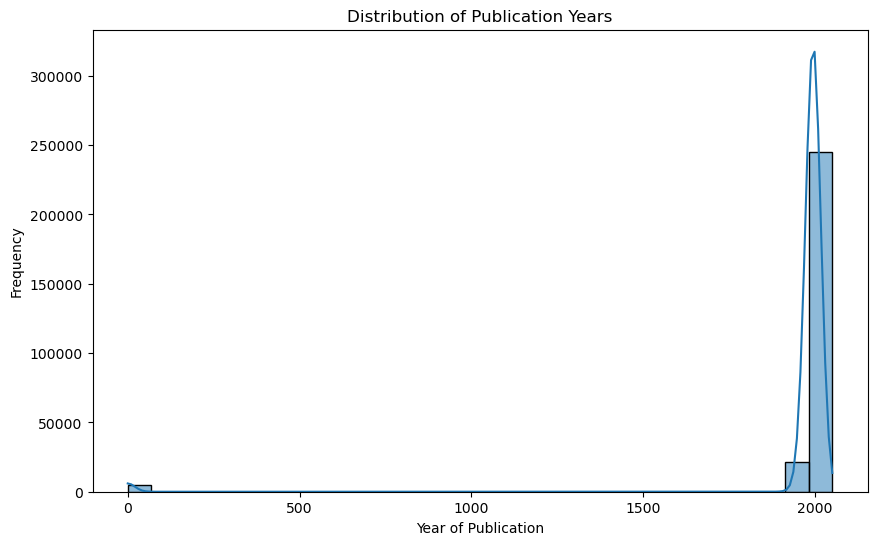

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(books['Year-Of-Publication'], bins=30, kde=True)
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

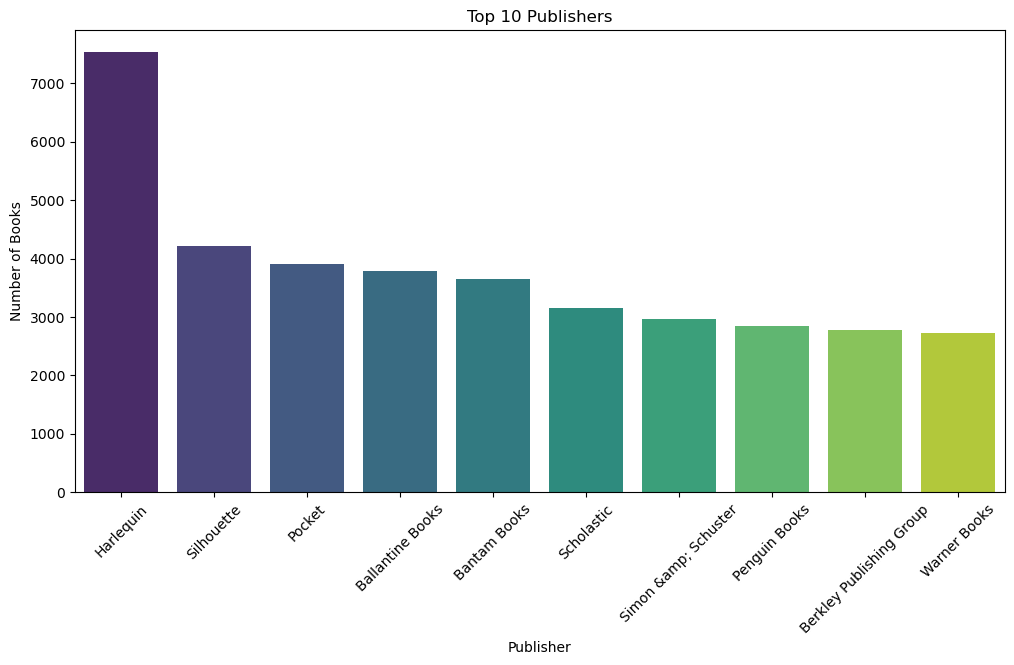

In [31]:
# Get the top 10 publishers
top_publishers = books['Publisher'].value_counts().head(10)

# Plot the top 10 publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Get the top 10 authors by the number of books
top_authors = books['Book-Author'].value_counts().head(10).index

# Filter the dataset for these authors
top_authors_books = books[books['Book-Author'].isin(top_authors)]

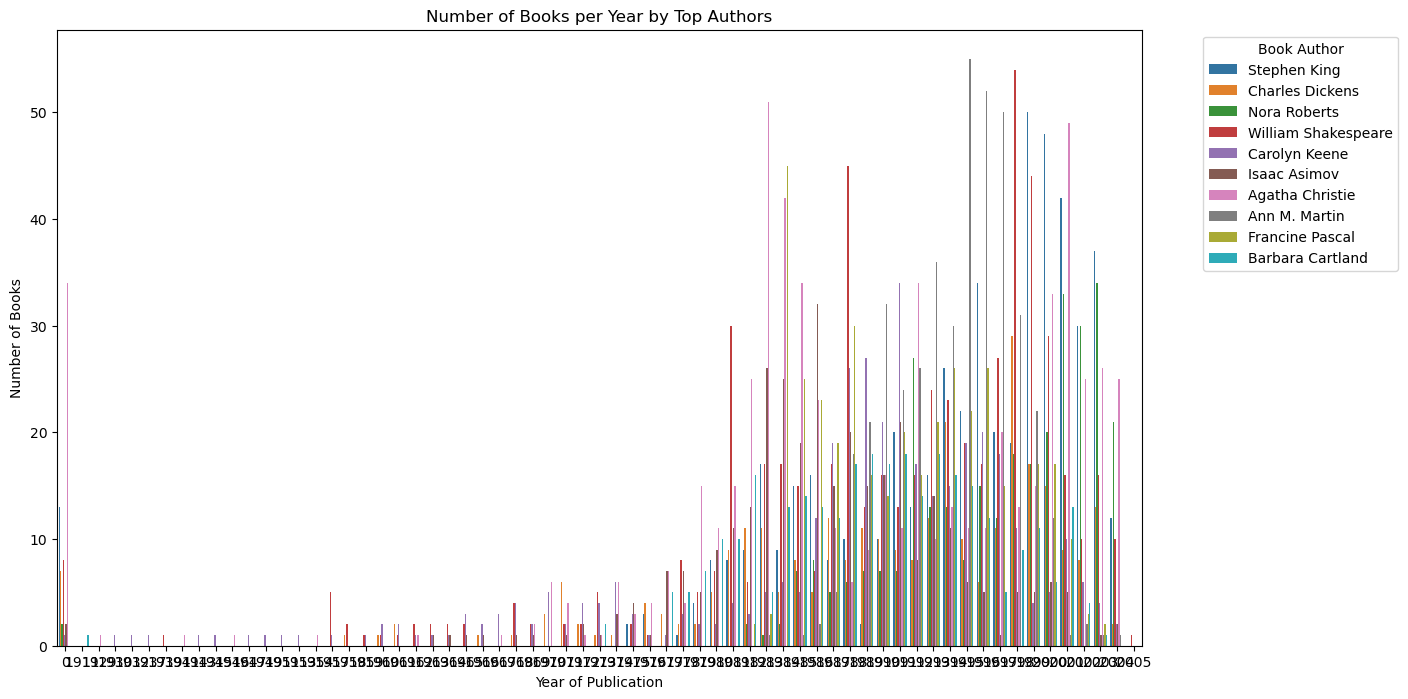

In [33]:
# Plot the number of books per year by top authors
plt.figure(figsize=(14, 8))
sns.countplot(data=top_authors_books, x='Year-Of-Publication', hue='Book-Author', palette='tab10')
plt.title('Number of Books per Year by Top Authors')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.legend(title='Book Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

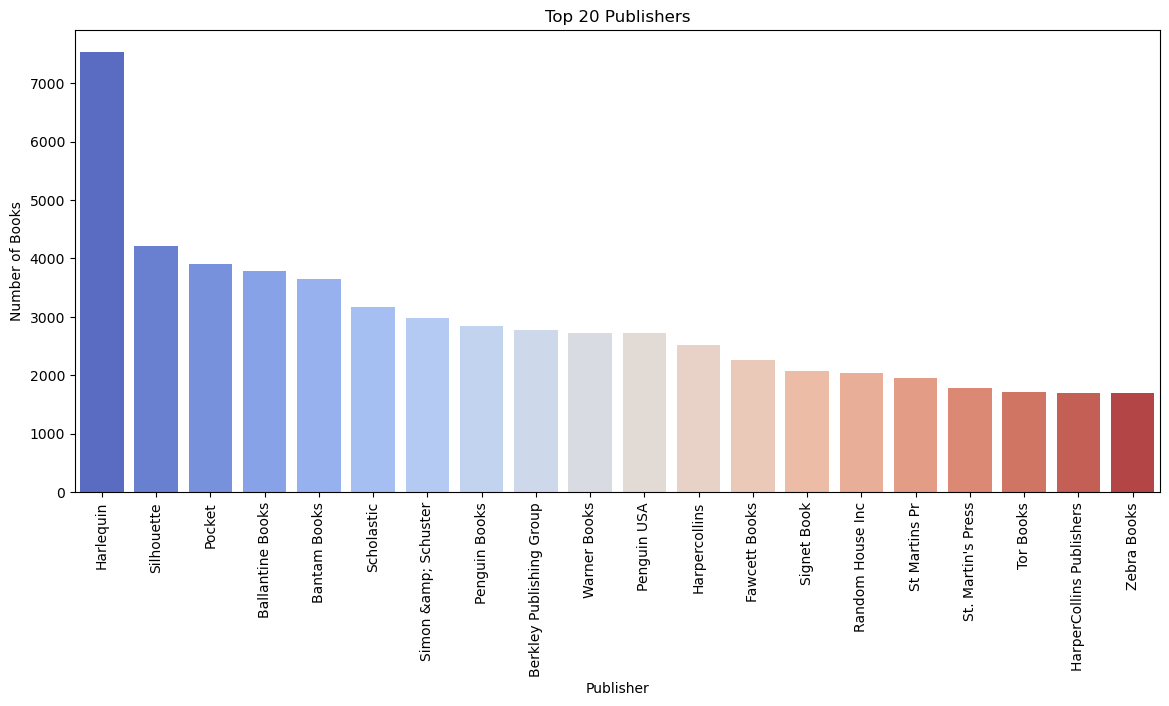

In [34]:
# Get the top 20 publishers by the number of books
top_20_publishers = books['Publisher'].value_counts().head(20)

# Plot the top 20 publishers
plt.figure(figsize=(14, 6))
sns.barplot(x=top_20_publishers.index, y=top_20_publishers.values, palette='coolwarm')
plt.title('Top 20 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

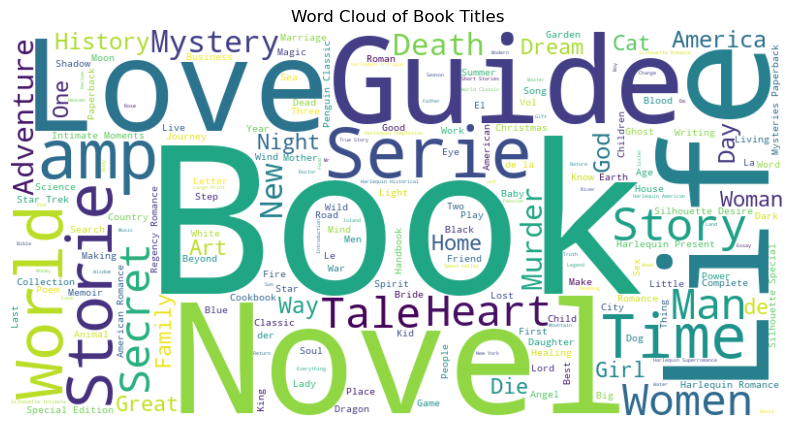

In [35]:
from wordcloud import WordCloud

# Combine all book titles into a single string
all_titles = ' '.join(books['Book-Title'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()

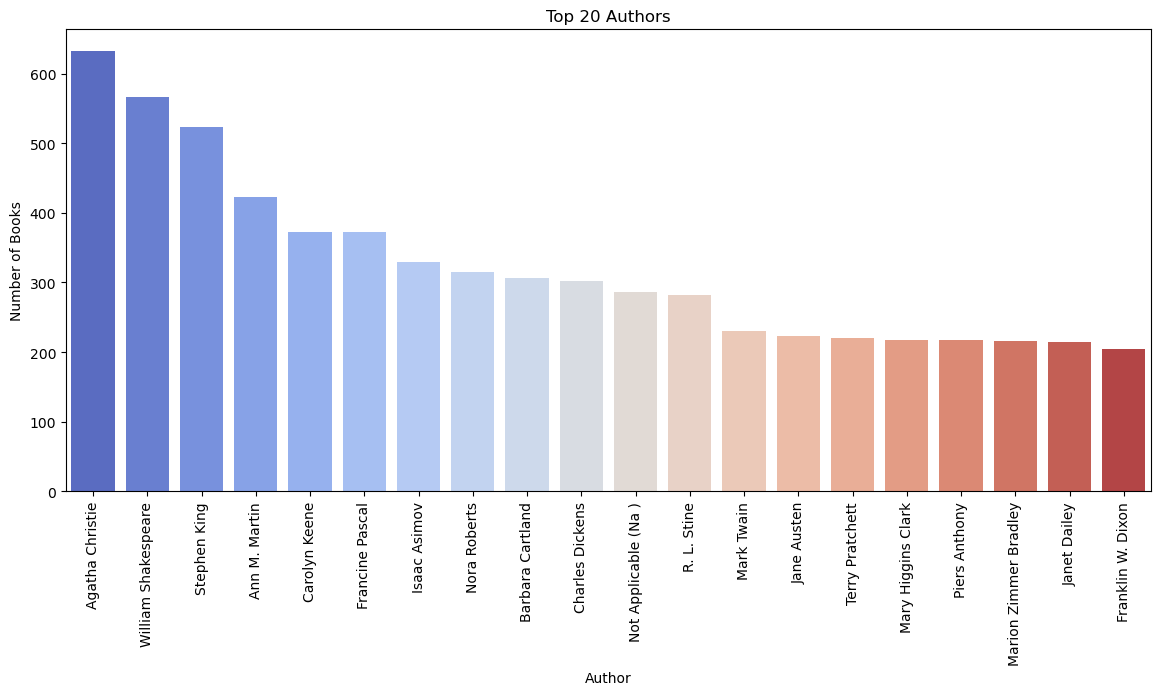

In [36]:
# Get the top 20 authors by the number of books
top_20_authors = books['Book-Author'].value_counts().head(20)

# Plot the top 20 authors
plt.figure(figsize=(14, 6))
sns.barplot(x=top_20_authors.index, y=top_20_authors.values, palette='coolwarm')
plt.title('Top 20 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

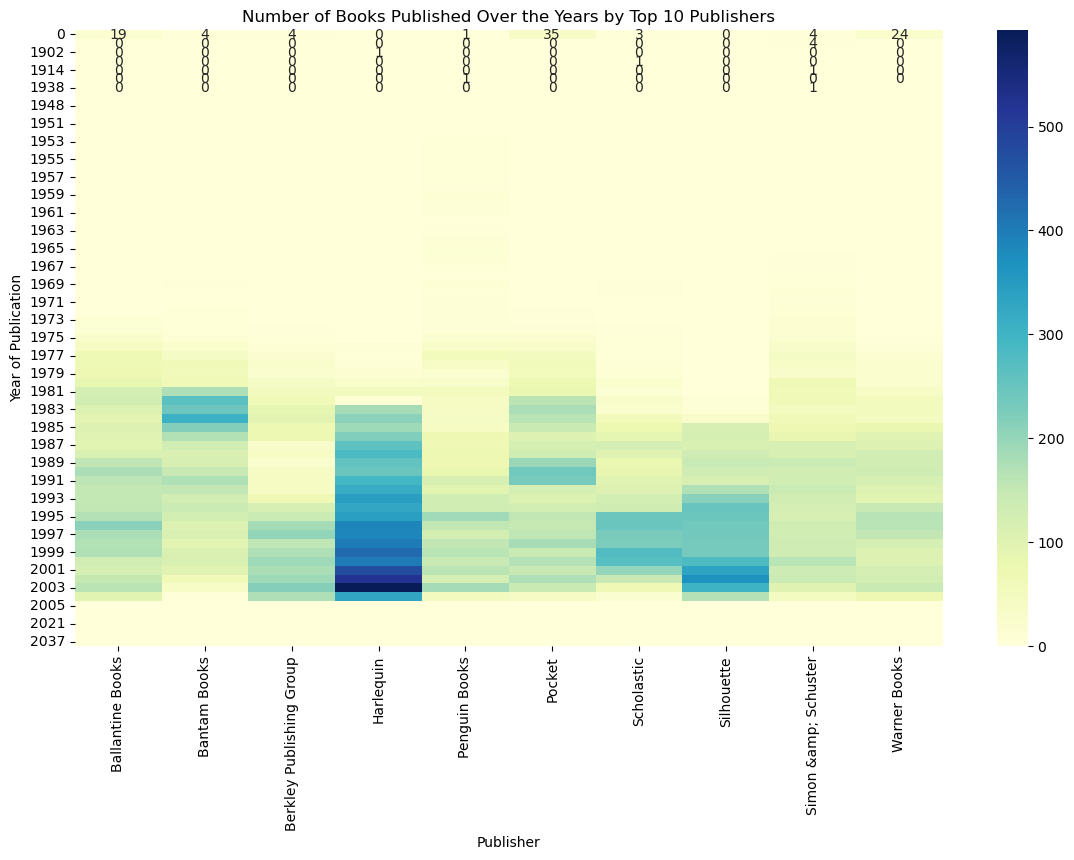

In [37]:
# Get the top 10 publishers
top_10_publishers = books['Publisher'].value_counts().head(10).index

# Filter the dataset for these publishers
top_publishers_books = books[books['Publisher'].isin(top_10_publishers)]

# Create a pivot table with years and publishers
pivot_table = top_publishers_books.pivot_table(index='Year-Of-Publication', columns='Publisher', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Number of Books Published Over the Years by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Year of Publication')
plt.show()

# Data Visualization - Users

In [51]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [52]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [53]:
users.Country.nunique()

572

In [55]:
users.head(2)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa


In [56]:
users.isnull().sum()

User-ID          0
Location         0
Age         110715
Country        928
dtype: int64

In [57]:
users['Country']=users['Country'].astype('str')

In [58]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '6sjr3weden', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alcobal portugal', 'alderney', 'algeria', 'algì portugal', 'allen', 'almerl spain', 'ama lurra', 'america', 'american samoa', 'andalucl spain', 'andaucl spain', 'andorra', 'angola', 'antarctica', 'aotearoa', 'aragz ethiopia', 'aragz spain', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'barcelonì', 'barcelonì spain', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'bergued catalonia', 'bergued spain', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria'

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


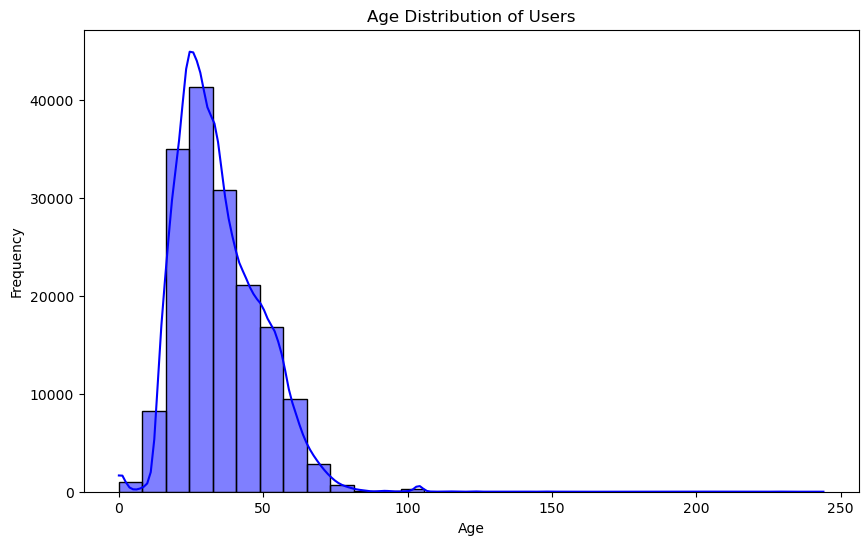

In [59]:
# Plot the distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

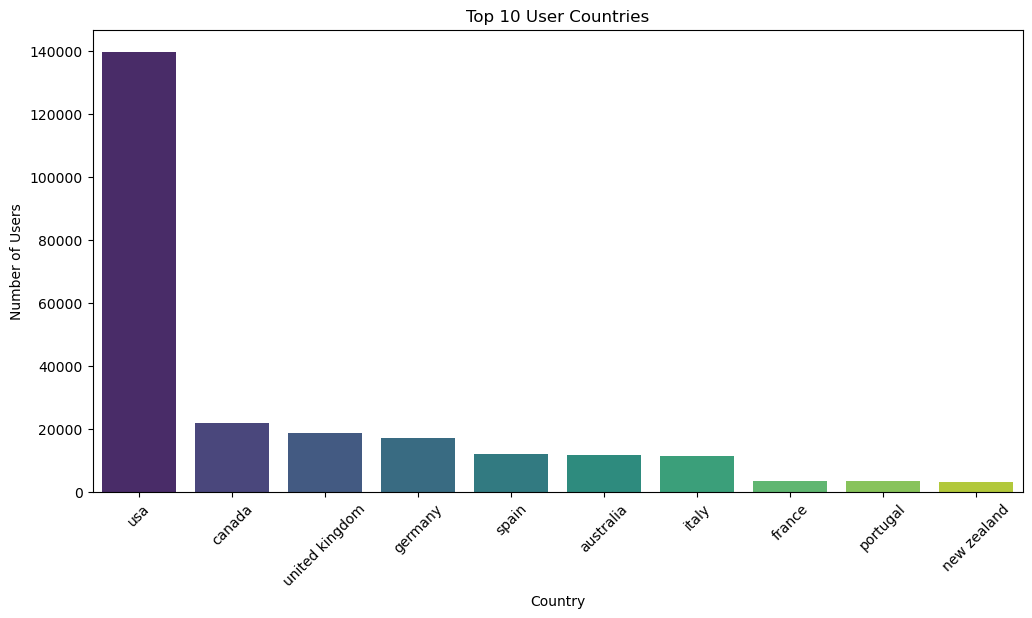

In [60]:
# Extracting the country information
users['Country'] = users['Location'].apply(lambda x: x.split(', ')[-1])

# Get the top 10 countries
top_countries = users['Country'].value_counts().head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 User Countries')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

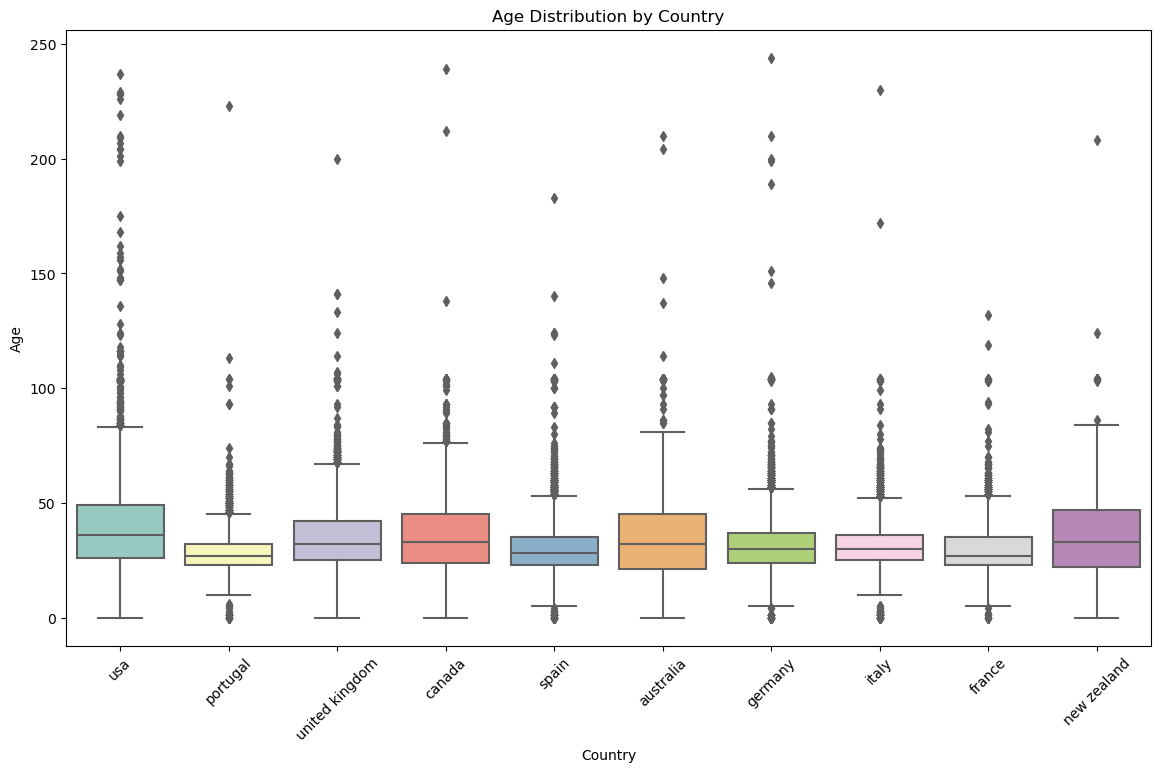

In [63]:
# Filter the dataset to include only the top 10 countries
top_country_users = users[users['Country'].isin(top_countries.index)]

# Plot the age distribution by country
plt.figure(figsize=(14, 8))
sns.boxplot(data=top_country_users, x='Country', y='Age', palette='Set3')
plt.title('Age Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

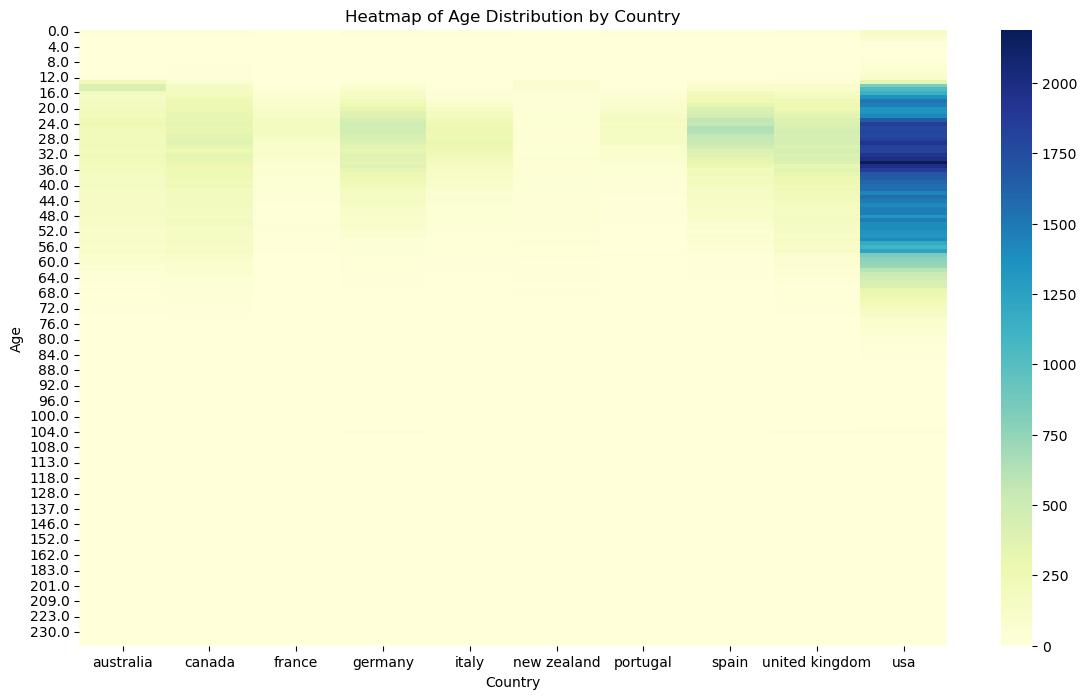

In [64]:
# Create a pivot table with age and country
age_country_pivot = top_country_users.pivot_table(index='Age', columns='Country', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(age_country_pivot, cmap='YlGnBu')
plt.title('Heatmap of Age Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

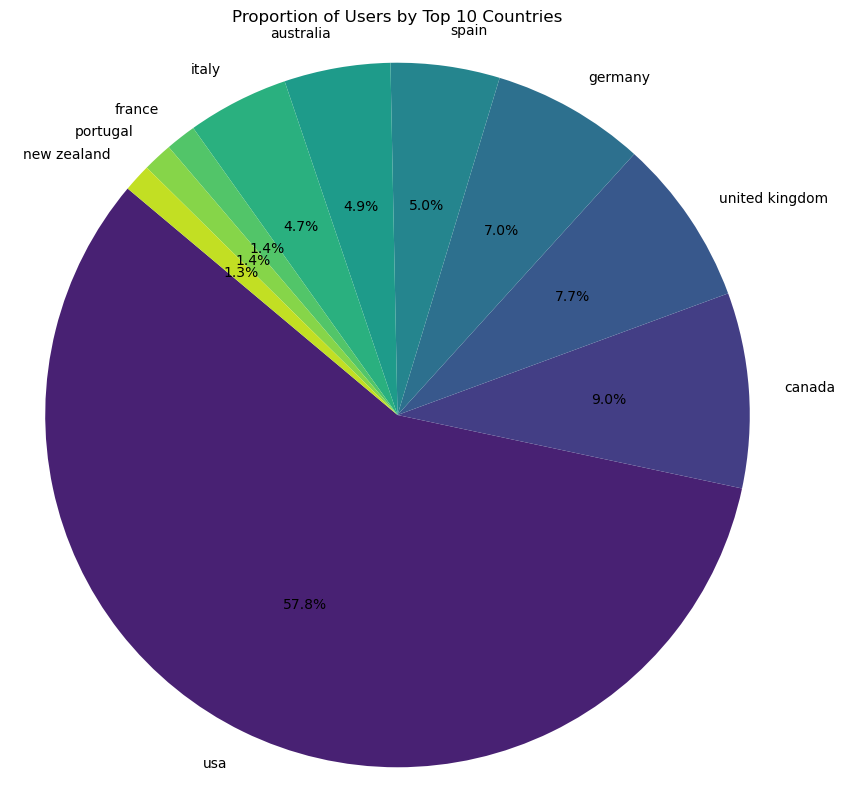

In [65]:
# Plot the pie chart of top countries
plt.figure(figsize=(10, 10))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_countries)))
plt.title('Proportion of Users by Top 10 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


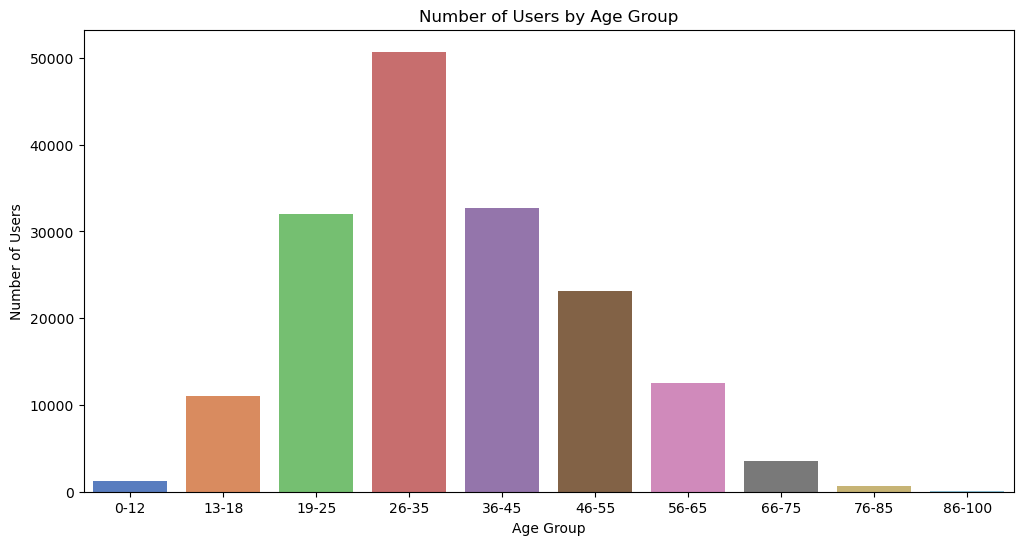

In [68]:
# Create age groups
age_bins = [0, 12, 18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['0-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
users['Age Group'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the number of users by age group
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', data=users, palette='muted')
plt.title('Number of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

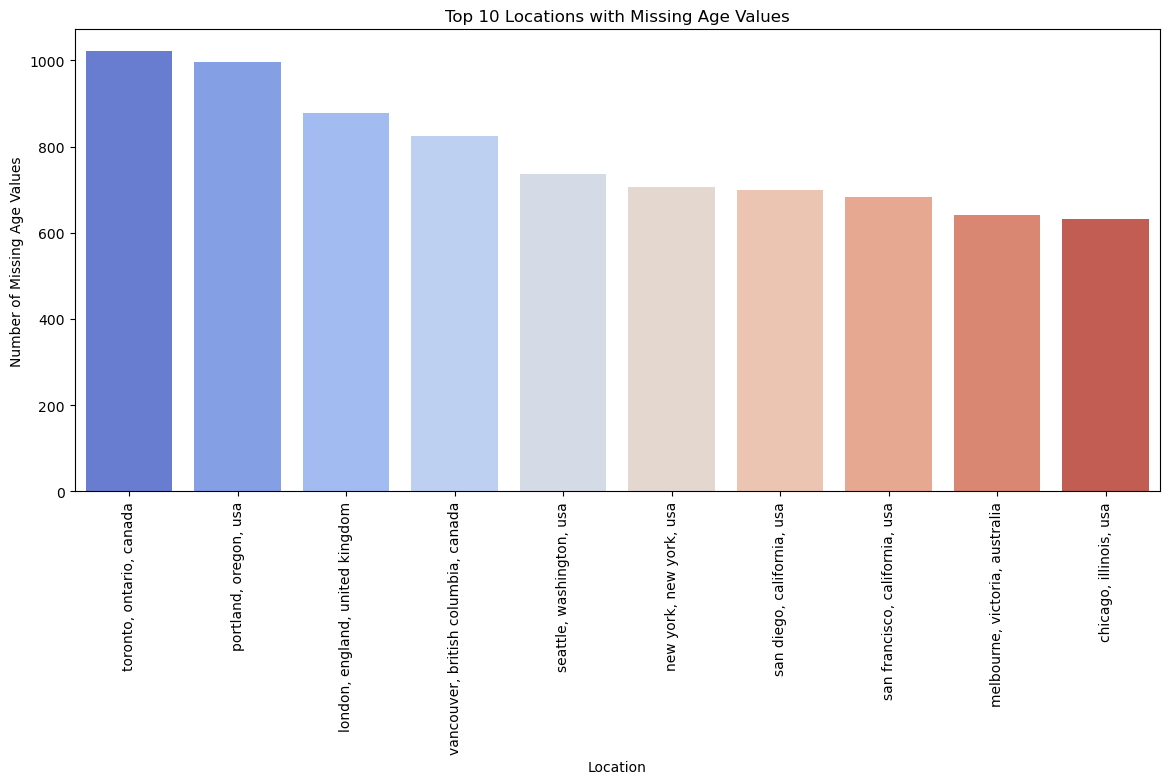

In [69]:
# Create a column indicating whether the age is missing
users['Age Missing'] = users['Age'].isnull()

# Get the top 10 locations with missing ages
top_missing_age_locations = users[users['Age Missing']]['Location'].value_counts().head(10)

# Plot the locations with missing ages
plt.figure(figsize=(14, 6))
sns.barplot(x=top_missing_age_locations.index, y=top_missing_age_locations.values, palette='coolwarm')
plt.title('Top 10 Locations with Missing Age Values')
plt.xlabel('Location')
plt.ylabel('Number of Missing Age Values')
plt.xticks(rotation=90)
plt.show()

- Most number of Users belongs to USA.

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


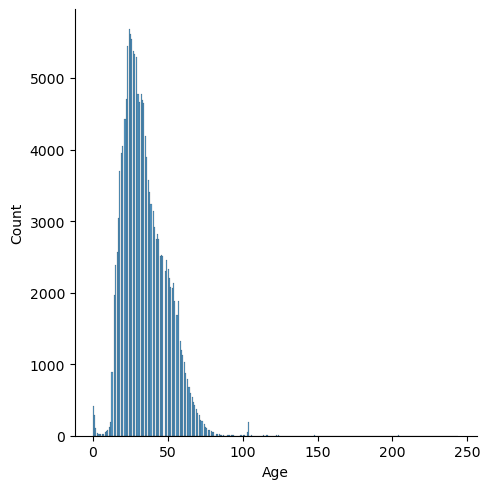

In [21]:
sns.displot(x='Age', data=users);

- Age values under 5 and over 100 are implausible for our book rating case, so we will replace them with NaN (Not a Number) values.

In [22]:
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [23]:
users.isna().sum()

User-ID         0
Age        111962
Country         0
dtype: int64

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


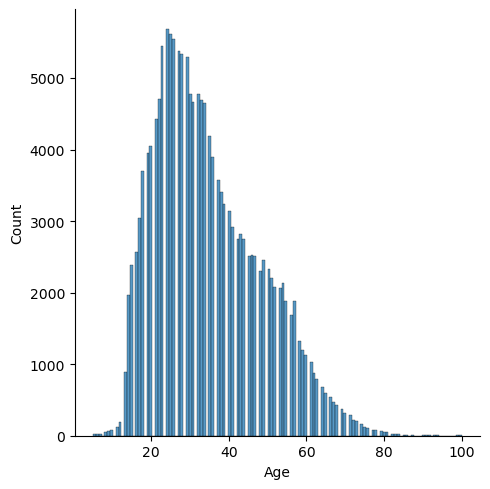

In [24]:
sns.displot(x='Age', data=users);

- Age has right-skewed distribution, so we'll use median to impute missing values, segmented by country to account for demographic differences.

In [25]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [26]:
users.isna().sum()

User-ID      0
Age        299
Country      0
dtype: int64

In [27]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [28]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [29]:
users.head(50)

,User-ID,Age,Country
0,1,36.000000,usa
1,2,18.000000,usa
2,3,23.000000,russia
3,4,17.000000,portugal
4,5,32.000000,united kingdom
5,6,61.000000,usa
6,7,36.000000,usa
7,8,33.000000,canada
8,9,36.000000,usa
9,10,26.000000,spain


# Data Visualization - Ratings

In [70]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


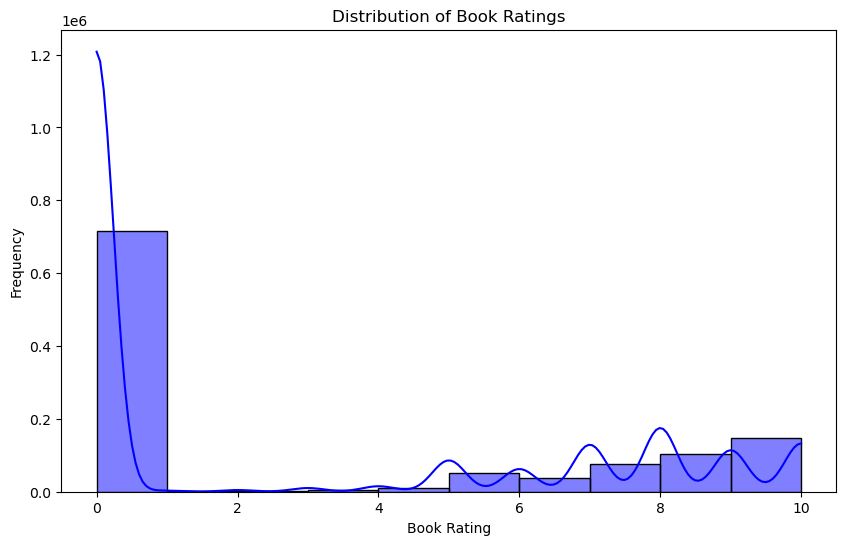

In [72]:
# Plot the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

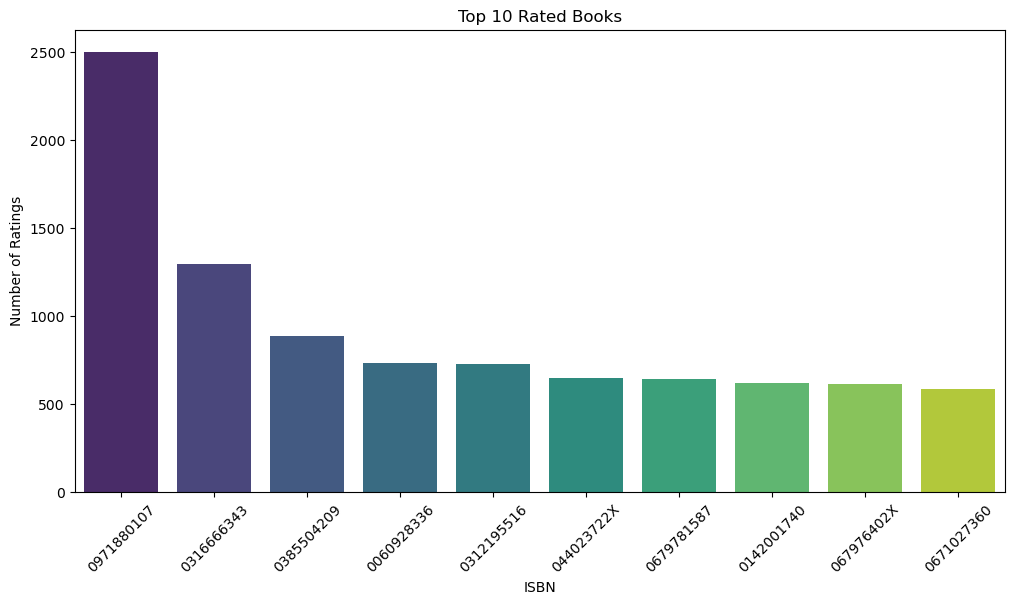

In [73]:
# Count the number of ratings for each book
top_rated_books = ratings['ISBN'].value_counts().head(10)

# Plot the top 10 rated books
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_books.index, y=top_rated_books.values, palette='viridis')
plt.title('Top 10 Rated Books')
plt.xlabel('ISBN')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


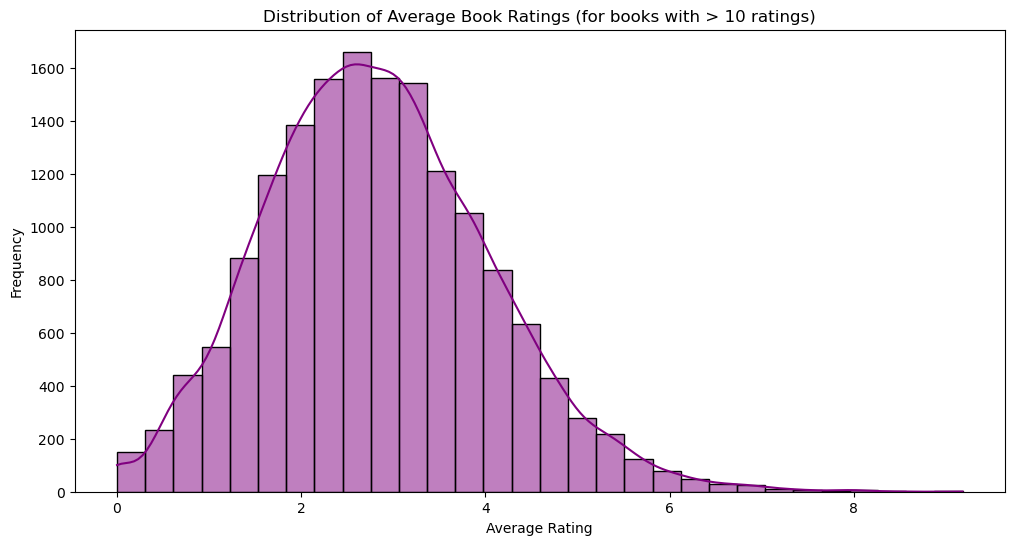

In [75]:
# Calculate the average rating per book
average_rating_per_book = ratings.groupby('ISBN')['Book-Rating'].mean()

# Filter books with a significant number of ratings (e.g., more than 10 ratings)
significant_books = ratings['ISBN'].value_counts()
significant_books = significant_books[significant_books > 10].index
average_rating_per_book = average_rating_per_book[significant_books]

# Plot the average ratings of significant books
plt.figure(figsize=(12, 6))
sns.histplot(average_rating_per_book, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Book Ratings (for books with > 10 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

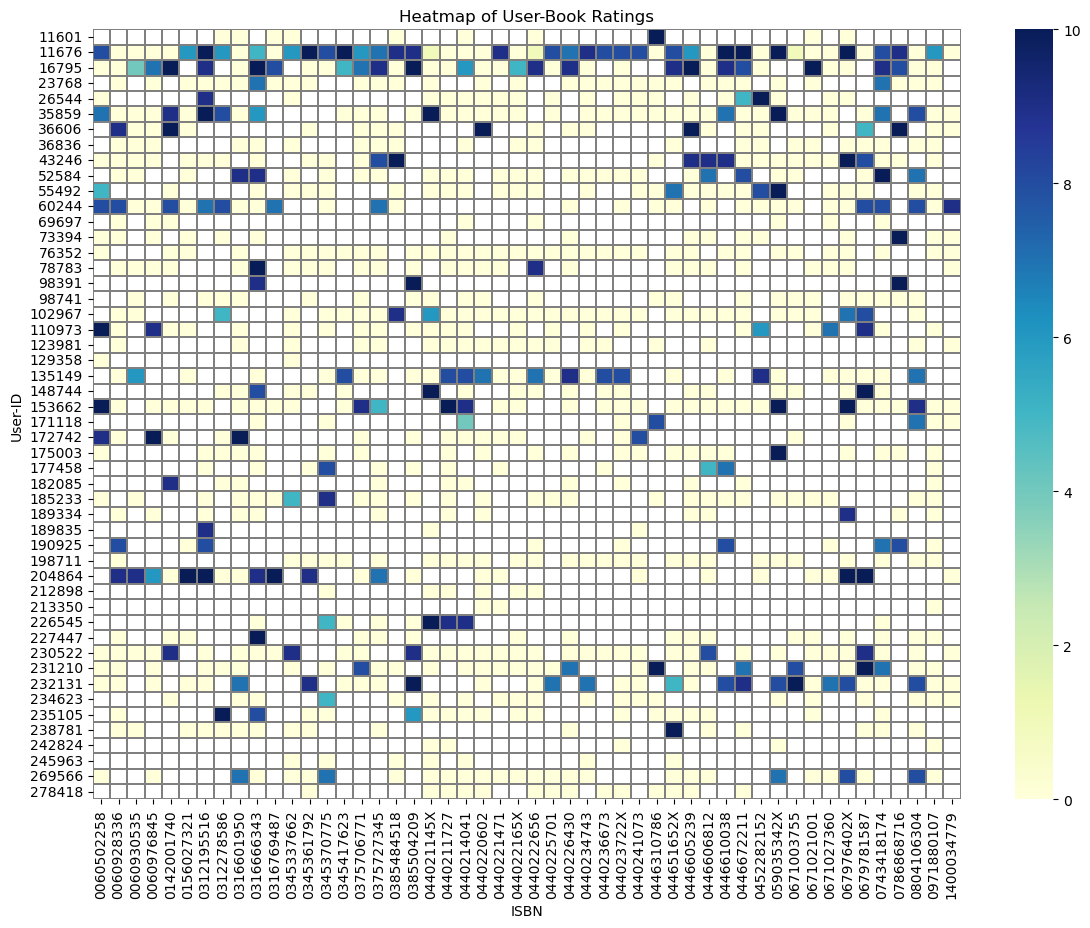

In [76]:
# Sample a subset of users and books for the heatmap
sampled_ratings = ratings[ratings['User-ID'].isin(ratings['User-ID'].value_counts().head(50).index) &
                          ratings['ISBN'].isin(ratings['ISBN'].value_counts().head(50).index)]

# Create a pivot table for the heatmap
pivot_table = sampled_ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.1, linecolor='gray')
plt.title('Heatmap of User-Book Ratings')
plt.xlabel('ISBN')
plt.ylabel('User-ID')
plt.show()

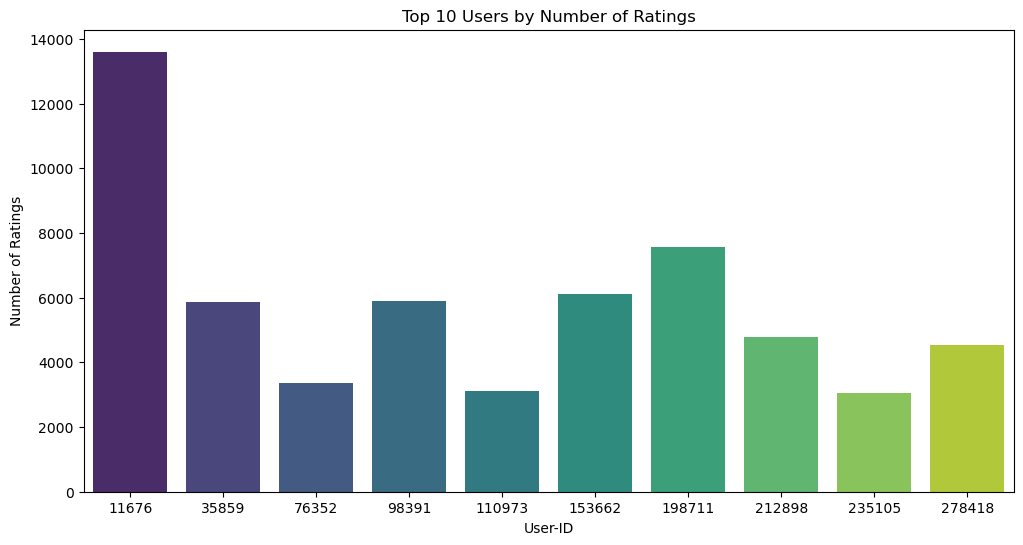

In [78]:
# Get the top 10 users by number of ratings
top_users = ratings['User-ID'].value_counts().head(10)

# Plot the top 10 users
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title('Top 10 Users by Number of Ratings')
plt.xlabel('User-ID')
plt.ylabel('Number of Ratings')
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


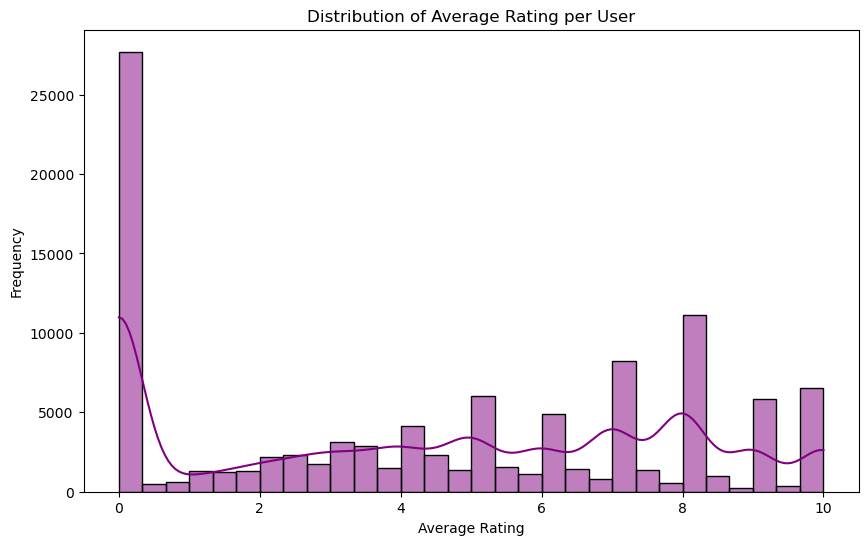

In [81]:
# Calculate the average rating per user
average_rating_per_user = ratings.groupby('User-ID')['Book-Rating'].mean()

# Plot the average rating per user
plt.figure(figsize=(10, 6))
sns.histplot(average_rating_per_user, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [83]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [84]:
users.head()

,User-ID,Location,Age,Country,Region,Age Group,Age Missing
0,1,"nyc, new york, usa",NaN,usa,new york,NaN,True
1,2,"stockton, california, usa",18.0,usa,california,19-25,False
2,3,"moscow, yukon territory, russia",NaN,russia,yukon territory,NaN,True
3,4,"porto, v.n.gaia, portugal",17.0,portugal,v.n.gaia,13-18,False
4,5,"farnborough, hants, united kingdom",NaN,united kingdom,hants,NaN,True


In [85]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [87]:
df = pd.merge(pd.merge(books, ratings, on='ISBN', how='inner'), users, on='User-ID', how='inner')

In [88]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country,Region,Age Group,Age Missing
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0.0,"stockton, california, usa",18.0,usa,california,19-25,False
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5.0,"timmins, ontario, canada",NaN,canada,ontario,NaN,True
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0.0,"timmins, ontario, canada",NaN,canada,ontario,NaN,True
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0.0,"timmins, ontario, canada",NaN,canada,ontario,NaN,True
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0.0,"timmins, ontario, canada",NaN,canada,ontario,NaN,True


In [90]:
# Drop unnecessary columns
df = df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L','Region','Age Group', 'Age Missing'], axis=1)

In [94]:
df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0.0,"stockton, california, usa",18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5.0,"timmins, ontario, canada",NaN,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0.0,"timmins, ontario, canada",NaN,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0.0,"timmins, ontario, canada",NaN,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0.0,"timmins, ontario, canada",NaN,canada
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0.0,"timmins, ontario, canada",NaN,canada
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,8,0.0,"timmins, ontario, canada",NaN,canada
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,8,0.0,"timmins, ontario, canada",NaN,canada
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,8,0.0,"timmins, ontario, canada",NaN,canada
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5.0,"timmins, ontario, canada",NaN,canada


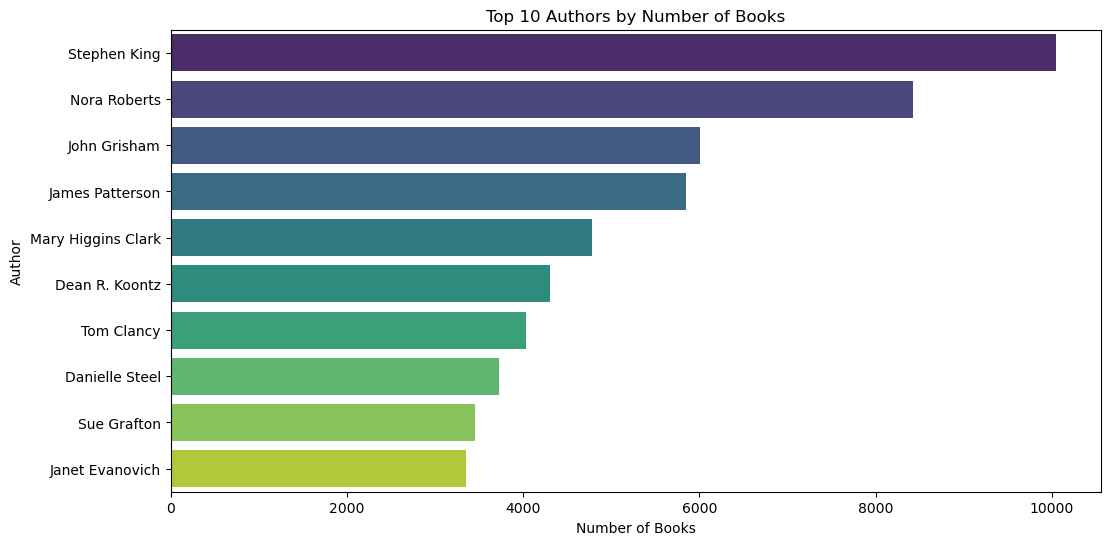

In [97]:
# Top 10 Authors by Number of Books
top_authors = df['Book-Author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()